In [62]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [6, 6]

In [100]:
w1 = np.array([1.,0.])
w2 = np.array([0.,1.])
o = np.array([0.,0.])

w12 = w2 - w1
w12 /= w12 @ w12
n12 = np.array([[0,-1],[1,0]]) @ w12
n12 /= np.sqrt(n12 @ n12)

In [101]:
def rot(theta):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
def plot_line(r1,r2,**kwargs):
    return plt.plot(*np.array([r1,r2]).transpose(),**kwargs)[0] 
def arrow(r1,r2):
    val = plot_line(r1,r2)
    plot_line(r2,r2+rot(np.pi/4) @ ((r1-r2)/10),c=val.get_color())
    plot_line(r2,r2+rot(-np.pi/4) @ ((r1-r2)/10),c=val.get_color())
def circle(pos,radius):
    angles = np.linspace(0,2*np.pi)
    plt.plot(pos[0] + radius * np.cos(angles), pos[1] + radius * np.sin(angles))

0.14142135623730945
True


array([-0.70710678, -0.70710678])

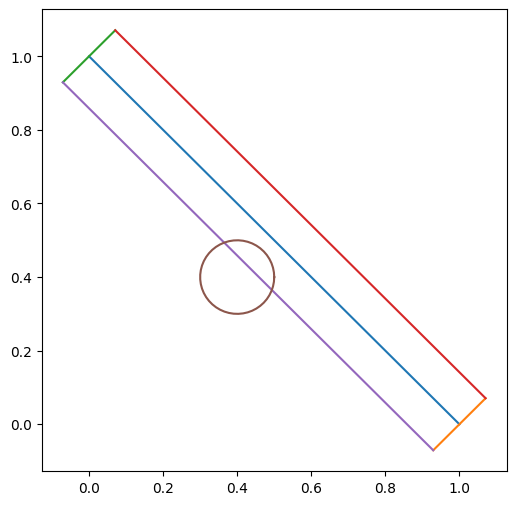

In [102]:
plot_line(w1,w2)
plot_line(w1-n12/10,w1+n12/10)
plot_line(w2-n12/10,w2+n12/10)
plot_line(w2-n12/10,w1-n12/10)
plot_line(w2+n12/10,w1+n12/10)

r = np.array((0.4,0.4))
dist_along_wall = (r-w1) @ w12
dist_from_wall = (r-(w1+w2)/2) @ n12
print(dist_from_wall)
print(0<dist_along_wall<1.)

circle(r,0.1)

In [103]:
np.array([[[1.,0.],[0.,1.]]]).shape

(1, 2, 2)